In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torch.utils.data as Data
from torchvision import transforms, datasets
import math

In [3]:
# print(data.iloc[:,p_s])
data = pd.read_csv(r"E:\code\meisai\source\2024\C\Wimbledon_featured_matches.csv", sep=',')
print(data.shape)
set_s=7 # H
game_s=9 #j
game_v=18 #S
set_v=19 #T
set_n=4 #E
game_n=5 #F
p_s=11 #L
server=13 #N
l=7283
x=np.zeros(7284)
num=0
p_v=15
p_p=16
p_=np.zeros([l+1])
q_=np.zeros([l+1])
print(data.iloc[9,p_s])
for i in range(0,l+1):
    if pd.isnull(data.iloc[i,p_s]):
        data.iloc[i,p_s]=0
    if pd.isnull(data.iloc[i,p_s+1]):
        data.iloc[i,p_s+1]=0
    if data.iloc[i,p_s]=='AD':
        data.iloc[i,p_s]=50
    if data.iloc[i,p_s+1]=='AD':
        data.iloc[i,p_s+1]=50
    if data.iloc[i,p_s]=='AD':
        data.iloc[i,p_s]=50
    if data.iloc[i,p_s+1]=='AD':
        data.iloc[i,p_s+1]=50
    num1=int(data.iloc[i,p_s])
    num2=int(data.iloc[i,p_s+1])
    p_[i]=num1-num2
    if data.iloc[i,game_n]==data.iloc[i-1,game_n]:
        q_[i]=q_[i-1]+1
    else:
        q_[i]=0
a=4
b=2
c=0.05
game_index=(data.iloc[:,set_s]-data.iloc[:,set_s+1])*a+(data.iloc[:,game_s]-data.iloc[:,game_s+1])*data.iloc[:,game_n]/2
game_index=game_index+p_*q_[i]/3*c

(7284, 46)
AD


In [4]:
# #test版本
# data = pd.read_csv(r"E:\code\meisai\source\2024\C\test.csv")
# print(data.shape)
# set_s=6 # H
# game_s=8 #j
# game_v=16 #S
# set_v=17 #T
# set_n=3 #E
# game_n=4 #F
# p_s=10 #L
# server=12 #N
# l=data.shape[0]+1
# x=np.zeros(l)
# num=0
# p_v=13
# p_p=14
# global num
# print(l)
# p_=np.zeros([l-1])
# q_=np.zeros([l-1])
# print(data.iloc[9,p_s])
# for i in range(0,l-1):
#     if pd.isnull(data.iloc[i,p_s]):
#         data.iloc[i,p_s]=0
#     if pd.isnull(data.iloc[i,p_s+1]):
#         data.iloc[i,p_s+1]=0
#     if data.iloc[i,p_s]=='AD':
#         data.iloc[i,p_s]=50
#     if data.iloc[i,p_s+1]=='AD':
#         data.iloc[i,p_s+1]=50
#     print(i)
#     num1=int(data.iloc[i,p_s])
#     num2=int(data.iloc[i,p_s+1])
#     p_[i]=num1-num2
#     if data.iloc[i,game_n]==data.iloc[i-1,game_n]:
#         q_[i]=q_[i-1]+1
#     else:
#         q_[i]=0
# print(p_)
# a=4
# b=2
# c=0.1
# game_index=(data.iloc[:,set_s]-data.iloc[:,set_s+1])*a+(data.iloc[:,game_s]-data.iloc[:,game_s+1])*data.iloc[:,game_n]/2
# game_index=game_index+p_*q_[i]/3*c
# game_index[l-2]=0
# print(game_index)

In [5]:
# 文件读取
def get_Data(data_path):
    data = pd.read_csv(r"E:\code\meisai\source\2024\C\tableConvert.com_j48lxj.csv", sep=',')
    RA=33
    RB=34
    p1_set=3
    p2_set=4
    p1_game=5
    p2_game=6
    server=7
    p_v=8
    data.fillna(0, inplace=True)
    label=game_index
    data=data.iloc[:,[p1_set,p2_set,p1_game,p2_game,server,33,34,19,20]]
    data['game_index']=game_index
    print(label)
    return data,label

In [6]:
# # 文件读取 test版本
# def get_Data(data_path):
#     data = pd.read_csv(r"E:\code\meisai\source\2024\C\test.csv", sep=',')
#     RA=44
#     RB=45
#     p1_set=6
#     p2_set=7
#     p1_game=8
#     p2_game=9
#     server=12
#     p_v=13
#     data.fillna(0, inplace=True)
#     label=game_index
#     data=data.iloc[:,[p1_set,p2_set,p1_game,p2_game,server,RA,RB,p_p,p_p+1]]
#     data['game_index']=game_index
#     print(label)
#     return data,label

In [7]:
# 数据预处理
def normalization(data,label):

    mm_x=MinMaxScaler() # 导入sklearn的预处理容器
    mm_y=MinMaxScaler()
    data=data.values    # 将pd的系列格式转换为np的数组格式
    label=np.array(label)
    data=mm_x.fit_transform(data) # 对数据和标签进行归一化等处理
    label=label.reshape(-1, 1)
    label=mm_y.fit_transform(label)



#正确归一化
#     train_data=data
#     val_data=label
#     train_data=train_data.select_dtypes(include='number')
#     print(train_data)
#     train_data_numpy = np.array(train_data)
#     train_mean = train_data_numpy.mean()
#     train_std  = np.std(train_data_numpy)
#     train_data_numpy = (train_data_numpy - train_mean) / train_std
#     train_data_tensor = torch.Tensor(train_data_numpy)
    
    
    
#     data=np.array(data)
#     for i in range(data.shape[1]):
#         m=np.sum(np.square(data[:][i]))
#         m=math.sqrt(m)
#         data[:][i]=data[:][i]/m

#正确归一化内容

#     val_data_numpy = np.array(val_data)
#     val_data_numpy = (val_data_numpy - train_mean) / train_std
#     val_data_tensor = torch.Tensor(val_data_numpy)
    
    
    
#     val_data_numpy=np.array(val_data)
#     m=np.sum(np.square(val_data_numpy))
#     m=math.sqrt(m)
 #   val_data_numpy=val_data_numpy/m
    return data,label,mm_y,mm_x

In [8]:
# 时间向量转换
def split_windows(data,seq_length):
    data = np.array(data)
    x=[]
    y=[]
    l=data.shape[1]
    for i in range(len(data)-seq_length-1): # range的范围需要减去时间步长和1
        _x=data[i:(i+seq_length),:l-1]
        _y=data[i+seq_length,-1]#取所有行最后一列对应的数据
        x.append(_x)
        y.append(_y)
    x,y=np.array(x),np.array(y)
    print('x.shape,y.shape=\n',x.shape,y.shape)
    return x,y

In [9]:
# 数据分离
def split_data(x,y,split_ratio):

    train_size=int(len(y)*split_ratio)
    test_size=len(y)-train_size

    x_data=Variable(torch.Tensor(np.array(x)))
    y_data=Variable(torch.Tensor(np.array(y)))

    x_train=Variable(torch.Tensor(np.array(x[0:train_size])))
    y_train=Variable(torch.Tensor(np.array(y[0:train_size])))
    y_test=Variable(torch.Tensor(np.array(y[train_size:len(y)])))
    x_test=Variable(torch.Tensor(np.array(x[train_size:len(x)])))

    print('x_data.shape,y_data.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape:\n{}{}{}{}{}{}'
    .format(x_data.shape,y_data.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape))

    return x_data,y_data,x_train,y_train,x_test,y_test

In [10]:
# 数据装入
def data_generator(x_train,y_train,x_test,y_test,n_iters,batch_size):

    num_epochs=n_iters/(len(x_train)/batch_size) # n_iters代表一次迭代
    num_epochs=int(num_epochs)
    train_dataset=Data.TensorDataset(x_train,y_train)
    test_dataset=Data.TensorDataset(x_train,y_train)
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False,drop_last=True) # 加载数据集,使数据集可迭代
    test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False,drop_last=True)

    return train_loader,test_loader,num_epochs

In [11]:
# 定义模型
from turtle import forward
import torch.nn as nn
import torch.nn.functional as F

# 定义一个类
class Net(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,output_size,batch_size,seq_length) -> None:
        super(Net,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.output_size=output_size
        self.batch_size=batch_size
        self.seq_length=seq_length
        self.num_directions=1 # 单向LSTM

        self.lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True) # LSTM层
        self.fc=nn.Linear(hidden_size,output_size) # 全连接层

    def forward(self,x):
        # h_0=Variable(torch.zeros(self.num_layers,x.size(0),self.output_size))
        # c_0=Variable(torch.zeros(self.num_layers,x.size(0),self.output_size))# 初始化h_0和c_0

        # pred, (h_out, _) = self.lstm(x, (h_0, c_0))
        # h_out = h_out.view(-1, self.hidden_size)
        # out = self.fc(h_out)

        # e.g.  x(10,3,100) 三个句子，十个单词，一百维的向量,nn.LSTM(input_size=100,hidden_size=20,num_layers=4)
        # out.shape=(10,3,20) h/c.shape=(4,b,20)
        batch_size, seq_len = x.size()[0], x.size()[1]    # x.shape=(604,3,3)
        h_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size)
        # output(batch_size, seq_len, num_directions * hidden_size)
        output, _ = self.lstm(x, (h_0, c_0)) # output(5, 30, 64)
        pred = self.fc(output)  # (5, 30, 1)
        pred = pred[:, -1, :]  # (5, 1)
        return pred

In [12]:
# 参数设置
seq_length=6 # 时间步长
input_size=9
num_layers=6
hidden_size=12
batch_size=25
n_iters=5000
lr=0.001
output_size=1
split_ratio=0.95
path='.\tableConvert.com_bvqnxd.csv'
moudle=Net(input_size,hidden_size,num_layers,output_size,batch_size,seq_length)
criterion=torch.nn.MSELoss()
optimizer=torch.optim.Adam(moudle.parameters(),lr=lr)
print(moudle)

Net(
  (lstm): LSTM(9, 12, num_layers=6, batch_first=True)
  (fc): Linear(in_features=12, out_features=1, bias=True)
)


In [13]:
# 数据导入
data,label=get_Data(path)
data,label,mm_y,mm_x=normalization(data,label)
x,y=split_windows(data,seq_length)
x=x.astype(float)
y=y.astype(float)
x_data,y_data,x_train,y_train,x_test,y_test=split_data(x,y,split_ratio)
train_loader,test_loader,num_epochs=data_generator(x_train,y_train,x_test,y_test,n_iters,batch_size)

0       0.000000
1      -1.250000
2       0.000000
3      -1.250000
4       0.000000
          ...   
7279    3.750000
7280    5.000000
7281    6.250000
7282    5.000000
7283    5.833333
Length: 7284, dtype: float64
x.shape,y.shape=
 (7278, 6, 9) (7278,)
x_data.shape,y_data.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape:
torch.Size([7278, 6, 9])torch.Size([7278])torch.Size([6914, 6, 9])torch.Size([6914])torch.Size([364, 6, 9])torch.Size([364])


In [14]:
# train

iter=0
for epochs in range(num_epochs):
  for i,(batch_x, batch_y) in enumerate (train_loader):
    outputs = moudle(batch_x)
    optimizer.zero_grad()   # 将每次传播时的梯度累积清除
    # print(outputs.shape, batch_y.shape)
    loss = criterion(outputs,batch_y) # 计算损失
    loss.backward() # 反向传播
    optimizer.step()
    iter+=1
    if iter % 100 == 0:
      print("iter: %d, loss: %1.5f" % (iter, loss.item()))

D:\program\anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


iter: 100, loss: 0.04803
iter: 200, loss: 0.01088
iter: 300, loss: 0.05248
iter: 400, loss: 0.00489
iter: 500, loss: 0.04785
iter: 600, loss: 0.05117
iter: 700, loss: 0.06146
iter: 800, loss: 0.00177
iter: 900, loss: 0.01310
iter: 1000, loss: 0.02147
iter: 1100, loss: 0.01306
iter: 1200, loss: 0.00285
iter: 1300, loss: 0.07882
iter: 1400, loss: 0.00857
iter: 1500, loss: 0.02861
iter: 1600, loss: 0.00364
iter: 1700, loss: 0.00348
iter: 1800, loss: 0.01292
iter: 1900, loss: 0.00199
iter: 2000, loss: 0.00773
iter: 2100, loss: 0.00144
iter: 2200, loss: 0.01185
iter: 2300, loss: 0.00426
iter: 2400, loss: 0.00177
iter: 2500, loss: 0.00842
iter: 2600, loss: 0.00117
iter: 2700, loss: 0.00244
iter: 2800, loss: 0.00566
iter: 2900, loss: 0.00958
iter: 3000, loss: 0.01821
iter: 3100, loss: 0.00474
iter: 3200, loss: 0.00392
iter: 3300, loss: 0.02538
iter: 3400, loss: 0.01468
iter: 3500, loss: 0.00846
iter: 3600, loss: 0.01071
iter: 3700, loss: 0.01012
iter: 3800, loss: 0.00318
iter: 3900, loss: 0.0

In [15]:
print(x_data.shape)

torch.Size([7278, 6, 9])


In [16]:
moudle.eval()
train_predict = moudle(x_data)
print(x_data.shape)    

torch.Size([7278, 6, 9])


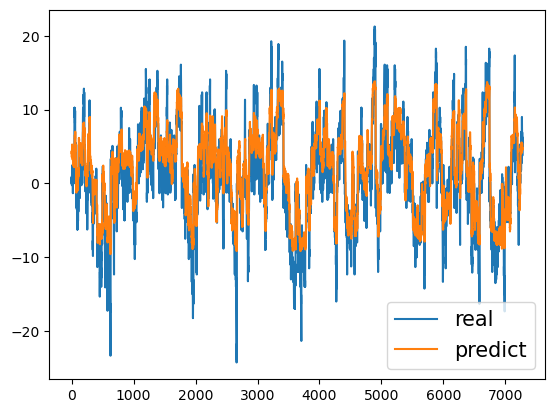

MAE/RMSE
2.475392
3.1105382


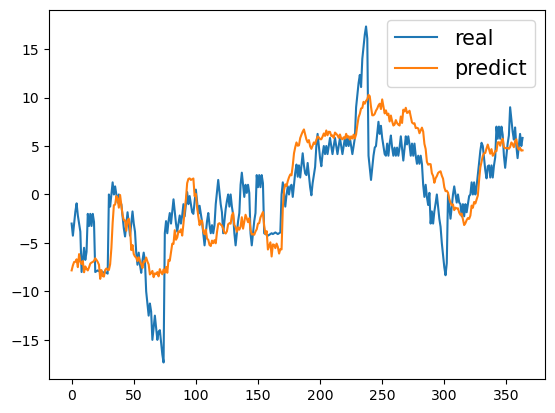

MAE/RMSE
2.4904985
3.1255622


In [26]:
def result(x_data, y_data):
  moudle.eval()
  train_predict = moudle(x_data)

  data_predict = train_predict.data.numpy()
  y_data_plot = y_data.data.numpy()
  y_data_plot = np.reshape(y_data_plot, (-1,1))  
  data_predict = mm_y.inverse_transform(data_predict)
  y_data_plot = mm_y.inverse_transform(y_data_plot)

  plt.plot(y_data_plot)
  plt.plot(data_predict)
  plt.legend(('real', 'predict'),fontsize='15')
  plt.show()

  print('MAE/RMSE')
  print(mean_absolute_error(y_data_plot, data_predict))
  print(np.sqrt(mean_squared_error(y_data_plot, data_predict) ))
  return y_data_plot,data_predict
train_real,train_predict=result(x_data, y_data)
test_real,test_predict=result(x_test,y_test)
out=pd.DataFrame(train_real)
out['train_real']=train_real
out['train_predict']=train_predict
out.to_csv('cancha.csv', index=False)

In [28]:
#test版本
data = pd.read_csv(r"E:\code\meisai\source\2024\C\test.csv")
print(data.shape)
set_s=6 # H
game_s=8 #j
game_v=16 #S
set_v=17 #T
set_n=3 #E
game_n=4 #F
p_s=10 #L
server=12 #N
l=data.shape[0]+1
x=np.zeros(l)
num=0
p_v=13
p_p=14
global num
print(l)
p_=np.zeros([l-1])
q_=np.zeros([l-1])
print(data.iloc[9,p_s])
for i in range(0,l-1):
    if pd.isnull(data.iloc[i,p_s]):
        data.iloc[i,p_s]=0
        print(i)
    if pd.isnull(data.iloc[i,p_s+1]):
        data.iloc[i,p_s+1]=0
        print(i)
    if data.iloc[i,p_s]=='AD':
        data.iloc[i,p_s]=50
    if data.iloc[i,p_s+1]=='AD':
        data.iloc[i,p_s+1]=50
    num1=int(data.iloc[i,p_s])
    num2=int(data.iloc[i,p_s+1])
    p_[i]=num1-num2
    if data.iloc[i,game_n]==data.iloc[i-1,game_n]:
        q_[i]=q_[i-1]+1
    else:
        q_[i]=0
print(p_)
a=4
b=2
c=0.1
game_index=(data.iloc[:,set_s]-data.iloc[:,set_s+1])*a+(data.iloc[:,game_s]-data.iloc[:,game_s+1])*data.iloc[:,game_n]/2
game_index=game_index+p_*q_[i]/3*c
game_index[l-2]=0
print(game_index)

(117, 47)
118
0
116
116
[ 15.   0.  15.  25. -15.   0.  15.   0.  10. -15.   0.  15.   0. -10.
   0. -10.  15.  30.  15.   0. -10.  15.  30.  40.  25. -15. -30. -15.
 -25. -10.  15.   0.  15.   0. -10.   0. -10.   0. -10.   0.  10. -15.
 -30. -40. -25. -10.   0.  10.  15.  30.  40.  25.  10. -15. -30. -40.
 -15. -30. -40. -25.  15.  30.  15.   0. -10. -15.   0. -15. -25.  15.
  30.  40.  25. -15. -30. -40. -15.   0.  15.  25. -15. -30. -15. -25.
 -10.  15.  30.  15.   0.  10.  15.  30.  15.  25. -15.   0.  15.   0.
  10.  15.  30.  40.  25.  10. -15.   0. -15.   0. -10. -15.   0.  15.
  25.  15.  30.  40.   0.]
0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
112     9.0
113    10.5
114    10.5
115    14.0
116     0.0
Length: 117, dtype: float64


In [29]:
# 文件读取 test版本
def get_Data_test():
    data = pd.read_csv(r"E:\code\meisai\source\2024\C\test.csv", sep=',')
    RA=44
    RB=45
    p1_set=6
    p2_set=7
    p1_game=8
    p2_game=9
    server=12
    p_v=13
    data.fillna(0, inplace=True)
    label=game_index
    label=pd.Series(label)
    data=data.iloc[:,[p1_set,p2_set,p1_game,p2_game,server,RA,RB,p_p,p_p+1]]
    data['game_index']=game_index
    print(label)
    return data,label

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
112     9.0
113    10.5
114    10.5
115    14.0
116     0.0
Length: 117, dtype: float64
x.shape,y.shape=
 (110, 6, 9) (110,)


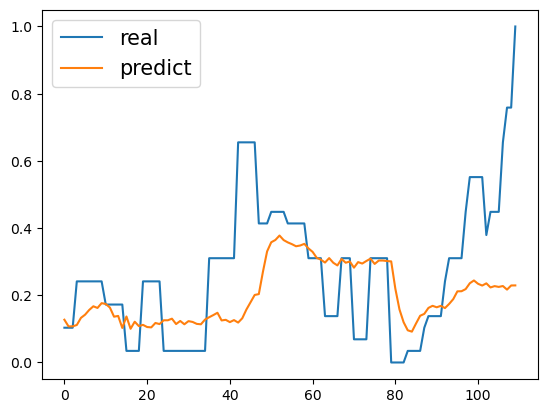

MAE/RMSE
0.35490113
0.38350958


In [30]:

test_data,test_label=get_Data_test()
# print(test_data)
# print(label)
test_data,test_label,test_mm_y,test_mm_x=normalization(test_data,label)
test_x,test_y=split_windows(test_data,seq_length)

test_data=Variable(torch.Tensor(np.array(test_x)))
test_label=Variable(torch.Tensor(np.array(test_y)))
# print('test_data:\n{}'.format(test_data))               
    
moudle.eval()
test_predict=moudle(test_data)
test_real=test_label

test_predict=test_predict.data.numpy()
test_real=test_real.data.numpy()
test_real=np.array(test_real)
test_real=np.reshape(test_real,(110,-1))
test_predict=test_mm_y.inverse_transform(test_predict)
test_real=test_mm_y.inverse_transform(test_real)


plt.plot(test_real)
plt.plot(test_predict-0.4)
plt.legend(('real','predict'),fontsize='15')
plt.show()

real_out=pd.DataFrame(test_real)
real_out['predict']=test_predict
real_out.to_csv('4_cancha.csv', index=False)

print('MAE/RMSE')
print(mean_absolute_error(test_real, test_predict))
print(np.sqrt(mean_squared_error(test_real, test_predict) ))

(7278, 1)


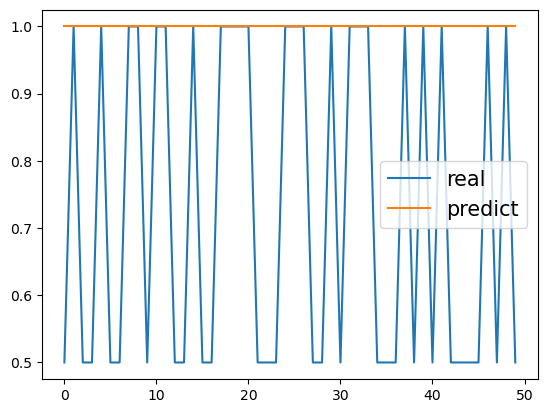

MAE/RMSE
0.24978809
0.24989001


In [32]:
def result(x_data, y_data):
  moudle.eval()
  train_predict = moudle(x_data)
  train_predict=train_predict
  data_predict = train_predict.data.numpy()
  y_data_plot = y_data.data.numpy()
  y_data_plot = np.reshape(y_data_plot, (-1,1))
#   data_predict = mm_y.inverse_transform(data_predict)
#   y_data_plot = mm_y.inverse_transform(y_data_plot)
#生成示例数据，包括10组数据，每组数据有100个随机数

#创建一个空白图形，包括10个子图
#   fig = plt.figure(figsize=(20, 50))
#   for i in range(10):
#     ax = fig.add_subplot(10, 1, i+1)
#     ax.plot(y_data_plot)
#     ax.plot(data_predict)
#         # 设置x轴和y轴标签
#     ax.set_xlabel('Index')
#     ax.set_ylabel('Value')
#     plt.legend(('real', 'predict'),fontsize='15')
#         # 设置子图的标题
#     ax.set_title('Plot %d' % (i+1))
  #plt.plot(y_data_plot)
  c,k=y_data_plot.shape
  print(y_data_plot.shape)
  out_plot=np.array([])
  y_plot=np.array([])
  num=0
  Mean1=data_predict.mean()
  Mean2=y_data_plot.mean()
  for i in range(0,50):
       
       q=2
       if 
       if data_predict[i] <0:
         q=1
       x=q
       #print(x)
       out_plot=np.append(out_plot,x)
  #out_plot=np.reshape(out_plot,(-1,1))
  plt.plot(y_data_plot[0:50])
  plt.plot(out_plot)
  plt.legend(('real', 'predict'),fontsize='15')
  plt.show()
#   plt.plot(data_predict)
#   plt.plot(y_data_plot)
#   plt.legend(( 'p''c'),fontsize='15')
#   plt.title('Scatter Chart')
#   plt.show()
  
  print('MAE/RMSE')
  print(mean_absolute_error(y_plot, data_predict))
  print(np.sqrt(mean_squared_error(y_data_plot, data_predict) ))
  return y_data_plot,data_predict

data_real,data_predict=result(x_data, y_data)
#data_test,test_predict=result(x_test,y_test)

In [33]:
import numpy
import csv
prediction=np.zeros((7,1))
prediction=np.append(prediction,data_predict)
y=np.zeros((7,1))
y=np.append(y,data_real)
with open('input.csv','w',encoding='utf8',newline='') as f :
    writer = csv.writer(f)
df = pd.read_csv(r"E:\code\meisai\source\2024\C\tableConvert.com_bvqnxd.csv")
df['prediction'] = prediction
df['real']=y

df.to_csv('output.csv', index=False)